# Analisando Dataset: Malha aérea Brasileira

**Imports iniciais**

In [2]:
!pip install nxviz

ERROR: Operation cancelled by user


In [3]:
import networkx as nx
import matplotlib.pyplot as plt
from nxviz import GeoPlot

## Importando Dataset

Importand o dataset do GitHub

In [1]:
!wget https://github.com/jaumpedro214/NetworkAnalysis/blob/main/MalhaAereaBrasileira/graph_br_flights.gml.gz?raw=true -O graph_br_flights.gml.gz

--2021-07-24 02:21:29--  https://github.com/jaumpedro214/NetworkAnalysis/blob/main/MalhaAereaBrasileira/graph_br_flights.gml.gz?raw=true
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/jaumpedro214/NetworkAnalysis/raw/main/MalhaAereaBrasileira/graph_br_flights.gml.gz [following]
--2021-07-24 02:21:29--  https://github.com/jaumpedro214/NetworkAnalysis/raw/main/MalhaAereaBrasileira/graph_br_flights.gml.gz
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/jaumpedro214/NetworkAnalysis/main/MalhaAereaBrasileira/graph_br_flights.gml.gz [following]
--2021-07-24 02:21:29--  https://raw.githubusercontent.com/jaumpedro214/NetworkAnalysis/main/MalhaAereaBrasileira/graph_br_flights.gml.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.1

In [4]:
graph = nx.read_gml('graph_br_flights.gml.gz')

## Visualizando os dados

Nesta seção, vamos visualizar os dados da nossa rede.

Informações contidas em um nó:

In [6]:
graph.nodes['SBSP']

{'LAT': -46.65638732910156,
 'LONG': -23.626110076904297,
 'REGIAO': 'SUDESTE',
 'UF': 'SP'}

Informações contidas em uma aresta:

In [7]:
graph['SBSP']['SBCF']

{'DISTANCIA_VOADA_KM': 174492.0,
 'EMPRESA_NACIONAL': 559,
 'IMPRODUTIVO': 96,
 'NATUREZA_DOMESTICA': 559,
 'VOOS': 559,
 'VOO_NAO_REGULAR': 83,
 'VOO_REGULAR': 380}

Uma possível análise com os dados que temos é a malha de voos entre as regiões.

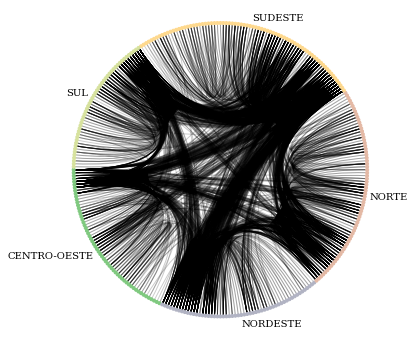

In [8]:
from nxviz.plots import CircosPlot

c = CircosPlot(graph, 
               node_grouping='REGIAO', node_color='REGIAO',
               group_label_position = 'middle')
c.draw()
plt.show()

## Exercício 1

Existe um voo direto de Natal para Belo Horizonte? 

In [9]:
"SBCF" in list(nx.DiGraph.neighbors(graph,"SBSG"))

True

## Exercício 2

Qual é a rota com menos voos de Conceição do Araguaia a Natal

In [10]:
nx.shortest_path(graph,"SBAA","SBSG")

['SBAA', 'SBGO', 'SBSG']

## Exercício 3

Indo de um aeroporto brasileiro, com a possibilidade de conexões, é possível viajar para qualquer outro aeroporto do país?

In [11]:
nx.is_strongly_connected(graph)

False